###  vstack  : 명령은 열의 수가 같은 두 개 이상의 배열을 위아래로 연결하여 행의 수가 더 많은 배열을 만든다

In [16]:
b1 = np.ones((2, 3))
print(b1)
b2 = np.zeros((3, 3))
print(b2)
np.vstack([b1, b2])

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([[1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

# 정규화
정규화(Normarlization)는 스케일링과 달리 개별 데이터의 크기를 모두 같게 만들기 위한 변환
개별 데이터에 대해 서로 다른 변환 계수가 적용

In [37]:
from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [2. 1. 0. 1. 2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [1. 1. 1. 1. 1.]


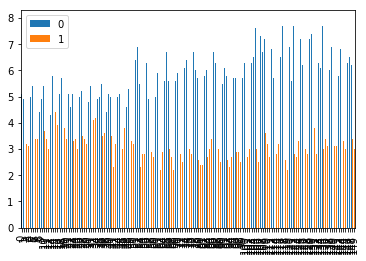

In [51]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()

data1 = iris.data[:,:2]
df1 = pd.DataFrame(data1)
df1.plot(kind='bar')


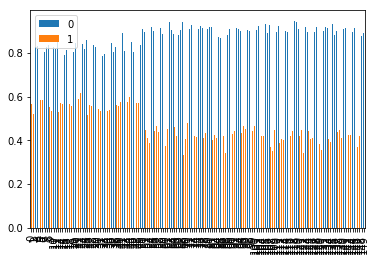

In [52]:
data3 = normalize(data1)
df3 = pd.DataFrame(data3)
df3.plot(kind='bar')

# 1. scaler

In [54]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
import pandas as pd
import numpy as np
x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)
print(x)
x = np.vstack([x, [20]])  # outlier
x

[[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]


array([[-3.],
       [-2.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [20.]])

In [59]:
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df.head()

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05


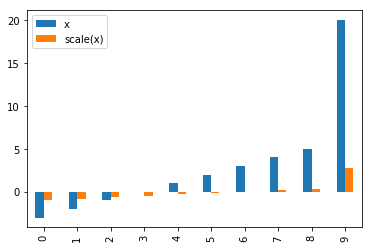

In [60]:
df = pd.DataFrame(np.hstack([x, scale(x)]), 
                  columns=["x", "scale(x)"])
df.plot(kind='bar')

In [62]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))

old mean: [5.84333333 3.05733333 3.758      1.19933333]
old std:  [0.82530129 0.43441097 1.75940407 0.75969263]
new mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
new std:  [1. 1. 1. 1.]


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

data1.std(), data2.std()

(1.9738430577598278, 1.0)